# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fadela Numah Kadenza
- **Email:** fadelanumah@gmail.com
- **ID Dicoding:** fadelyang

## Menentukan Pertanyaan Bisnis

- bagaimana tren penggunaan sepeda sepanjang tahun 2011 dan 2012?
- pada musim apa jumlah penggunaan sepeda paling tinggi?
- sejauh apa kondisi cuaca berpengaruh terhadap minat orang terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

## Data Wrangling

### Gathering Data

In [366]:
# memuat data day dan hour bike sharing
day_df = pd.read_csv("./data_csv/Bike-sharing-dataset/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [367]:
hour_df = pd.read_csv("./data_csv/Bike-sharing-dataset/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [368]:
# pertanyaan bisnis tidak mengarah penggunaan sepeda terhadap jam tertentu, maka hour_df tidak dibutuhkan lagi
del hour_df

#### Menilai Data day_df

In [369]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [370]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [371]:
# mengecek apakah ada duplikasi
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


In [372]:
# mengecek apakah ada data yang null
print("Jumlah kolom null: ", day_df.isna().sum())

Jumlah kolom null:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

#### Cleaning data day_df

In [373]:
# merubah beberapa nama kolom agar mudah dibaca
column_rename_mapping = {
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_situation",
    "temp": "temperature",
    "atemp": "feeling_temperature",
    "hum": "humidity",
    "cnt": "count"  
}

day_df.rename(columns=column_rename_mapping, inplace=True)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [374]:
# merubah dateday menhjadi tipe data datetime

day_df["dateday"] = pd.to_datetime(day_df["dateday"])
day_df["dateday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dateday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [375]:
# merubah value data categorical dengan value sebenarnya (tidak diwakili angka) agar lebih mudah dibaca
# kolom season
day_df["season"] = day_df["season"].astype("category")
day_df["season"] = day_df["season"].cat.rename_categories({
    1: "springer",
    2: "summer",
    3: "fall",
    4: "winter"
})

# kolom year
day_df["year"] = day_df["year"].astype("category")
day_df["year"] = day_df["year"].cat.rename_categories({
    0: "2011",
    1: "2012"
})

# kolom month
day_df["month"] = day_df["month"].astype("category")
day_df["month"] = day_df["month"].cat.rename_categories({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Des"
})

# kolom weather_situation
day_df["weather_situation"] = day_df["weather_situation"].astype("category")
day_df["weather_situation"] = day_df["weather_situation"].cat.rename_categories({
    1: "Clear/Partly cloudy",
    2: "Mist/Cloudy",
    3: "Light rain/snow",
    4: "Heavy rain/snow",
})

# kolom weekday
day_df["weekday"] = day_df["weekday"].astype("category")
day_df["weekday"] = day_df["weekday"].cat.rename_categories({
    0: "Sun",
    1: "Mon",
    2: "Thu",
    3: "Wed",
    4: "Tue",
    5: "Fri",
    6: "Sat",
})

# kolom holiday
day_df["holiday"] = day_df["holiday"].astype("category")
day_df["holiday"] = day_df["holiday"].cat.rename_categories({
    0: "No",
    1: "Yes",
})

# kolom Working
day_df["workingday"] = day_df["workingday"].astype("category")
day_df["workingday"] = day_df["workingday"].cat.rename_categories({
    0: "No",
    1: "Yes",
})


day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,Jan,No,Sat,No,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,Jan,No,Sun,No,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,Jan,No,Mon,Yes,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,Jan,No,Thu,Yes,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,Jan,No,Wed,Yes,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore data day_df

In [376]:
# tren penggunaan sepeda sepanjang tahun 2011 dan 2012
day_df.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

casual  registered   count
year month                            
2011 Jan      3073       35116   38189
     Feb      6242       41973   48215
     Mar     12826       51219   64045
     Apr     22346       72524   94870
     May     31050      104771  135821
     Jun     30612      112900  143512
     Jul     36452      104889  141341
     Aug     28842      107849  136691
     Sep     26545      100873  127418
     Oct     25222       98289  123511
     Nov     15594       86573  102167
     Des      8448       78875   87323
2012 Jan      8969       87775   96744
     Feb      8721       94416  103137
     Mar     31618      133257  164875
     Apr     38456      135768  174224
     May     44235      151630  195865
     Jun     43294      159536  202830
     Jul     41705      161902  203607
     Aug     43197      171306  214503
     Sep     43778      174795  218573
     Oct     34538      164303  198841
     Nov     21009      131655  152664
     Des     13245      110468  123713

In [377]:
# melihat sebaran musim dan bulan
# tren penggunaan sepeda sepanjang tahun 2011 dan 2012
day_df.groupby(by=["year", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

casual  registered   count
year season                              
2011 springer   21425      128575  150000
     summer     77564      269752  347316
     fall       95450      324200  419650
     winter     52813      273324  326137
2012 springer   39197      282151  321348
     summer    125958      445315  571273
     fall      130641      510838  641479
     winter     76969      438507  515476

In [378]:
# jumlah pengguna sepeda berdasarkan musim
day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
season,,,
springer,60622,410726,471348
summer,203522,715067,918589
fall,226091,835038,1061129
winter,129782,711831,841613


In [379]:
# melihat kondisi cuaca dan pengaruhnya terhadap jumlah pengguna sepda
day_df.groupby(by=["weather_situation"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
weather_situation,,,
Clear/Partly cloudy,446346,1811606,2257952
Mist/Cloudy,169776,827082,996858
Light rain/snow,3895,33974,37869


In [380]:
# ada yang janggal, apakah benar tidak ada satupun orang yang menyewa sepeda di saat kondisi heavy rain/snow
print('Clear/Partly cloudy' in day_df['weather_situation'].unique())
print('Mist/Cloudy' in day_df['weather_situation'].unique())
print('Light rain/snow' in day_df['weather_situation'].unique())
print('Heavy rain/snow' in day_df['weather_situation'].unique())

True
True
True
False


In [381]:
# tren pengguna sepeda saat working day
day_df.groupby(by=["workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [382]:
# tren pengguna sepeda saat holiday
day_df.groupby(by=["holiday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana tren penggunaan sepeda sepanjang tahun 2011 dan 2012?

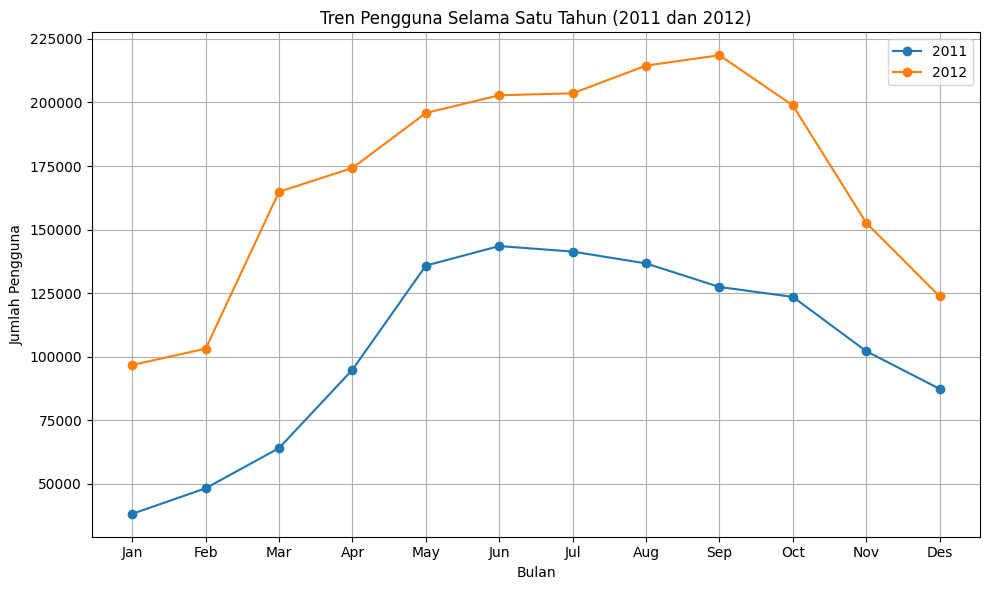

In [388]:
# melihat seberapa banyak penyewa sepeda setiap bulan sepanjang tahun 2011 dan 2012
by_yearly_monthly_counts_df = day_df.groupby(["year", "month"])["count"].sum().unstack()

plt.figure(figsize=(10, 6))

for year in by_yearly_monthly_counts_df.index:
    plt.plot(
        by_yearly_monthly_counts_df.columns,
        by_yearly_monthly_counts_df.loc[year],
        label=year,
        marker='o'
        )

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Tren Pengguna Selama Satu Tahun (2011 dan 2012)')
plt.grid(True)
plt.xticks(range(0, 12))
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

day_df.to_csv("data.csv", index=False)

### Pertanyaan 2: pada musim apa jumlah penggunaan sepeda paling tinggi?

3292679


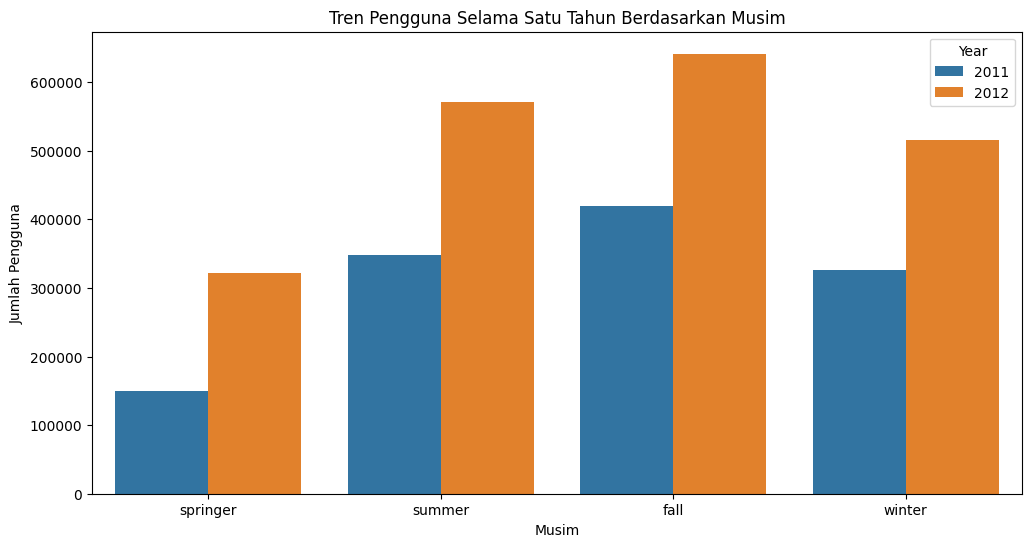

In [387]:
# Melihat jumlah pengguna sepeda berdasarkan musim
by_season_df = day_df.groupby(["year", "season"])["count"].sum().reset_index()
print(day_df["count"].sum())
plt.figure(figsize=(12, 6))

sns.barplot(x="season", y="count", hue="year", data=by_season_df)

plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Tren Pengguna Selama Satu Tahun Berdasarkan Musim')
plt.legend(title='Year')
plt.show()


### Pertanyaan 3: sejauh apa kondisi cuaca berpengaruh terhadap minat orang terhadap penggunaan sepeda?

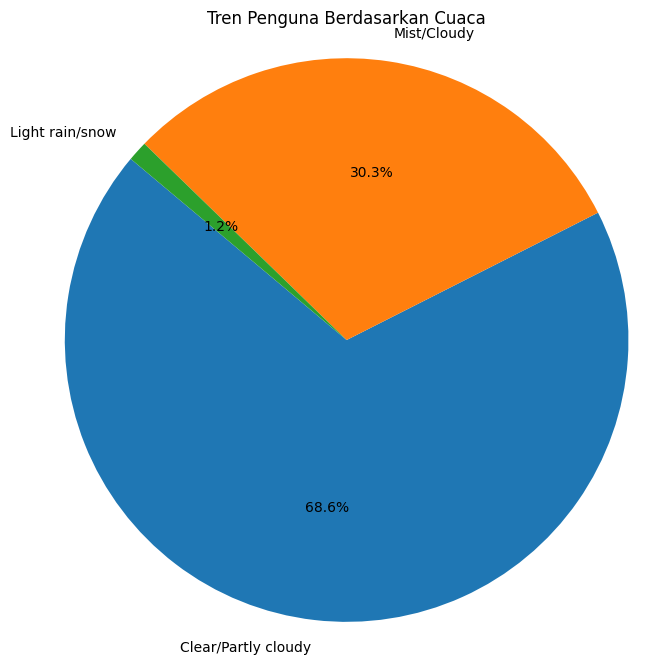

In [385]:
by_weather_df = day_df.groupby(["weather_situation"])["count"].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    by_weather_df.values,
    labels=by_weather_df.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.axis('equal')

plt.title('Tren Penguna Berdasarkan Cuaca')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Conclution dari pertanyaan satu adalah penggunaan penyewaan sepeda mengalami kenaikan yang cukup signifikan di setiap bulannya, tetapi trennya masih sama dimana penyewaan sepeda mengalami peningkatan di awal bulan Februari hingga akhirnya kembali turun kembali di bulan September - Oktober
- Conclution pertanyaan 2: Conclution dari pertanyaan dua adalah penggunaan penyewaan sepeda paling banyak di musim gugur dimana hal ini juga sejalan dengan tren yang diperlihatkan dari conclution pertanyaan satu (puncaknya di bulan september). namun dari pertanyaan ini juga bisa melihat bahwa pengguna bike sharing lebih banyak di musim dingin dibanding musim semi
- Conclution pertanyaan 3: Conclution dari pertanyaan ini adalah, sebagian besar pengguna bike sharing lebih suka menggunakan layanan ini ketia cuaca sedang cerah atau berawan, penggunaan akan menurun ketika cuaca sedang berkabut. penggunaan bike sharing semakin sedikit ketika cuaca sedang hujan,  ringan, dan tidak ada sama sekali yang menggunakan bike sharing ketika cuaca sedang hujan deras

In [386]:
day_df.to_csv("data.csv", index=False)